In [35]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import csv

In [17]:
#Import the data
data = pd.read_csv("turing/turing.csv", sep=";", encoding='latin-1')
data.rename(columns={
    "Indiquez votre certitude dans le fait que c'est un humain qui a pris la décision ?\n":
    'human',
    "Indiquez votre certitude dans le fait que c'est un humain qui a pris la décision ?\n\n":
    'human',
    "Indiquez votre certitude dans le fait que c'est un humain qui a pris la décision ?\n\n2":
    'human',
    "Indiquez votre certitude dans le fait que c'est un humain qui a pris la décision ?\n\n3":
    'robot',
    "Indiquez votre certitude dans le fait que c'est un humain qui a pris la décision ?\n\n4":
    'human',
    "Indiquez votre certitude dans le fait que c'est un humain qui a pris la décision ?\n\n5":
    'human',
    "Indiquez votre certitude dans le fait que c'est un humain qui a pris la décision ?\n\n6":
    'robot',
    "Indiquez votre certitude dans le fait que c'est un humain qui a pris la décision ?\n\n7":
    'robot',
    "Indiquez votre certitude dans le fait que c'est un humain qui a pris la décision ?\n\n8":
    'robot'
},
            inplace=True,
            errors='raise')
data = data.drop(columns=[
    'ID', 'Heure de début', 'Heure de fin', 'Adresse de messagerie', 'Nom'
])
data

,human,human,human,robot,human,human,robot,robot,robot
0,8,2,8,2,1,10,9,10,1
1,7,10,9,7,10,10,6,7,8
2,3,10,4,10,4,10,7,10,10
3,10,0,5,10,0,10,0,10,10
4,6,10,8,9,3,5,8,7,8
5,6,10,8,9,3,5,8,7,8


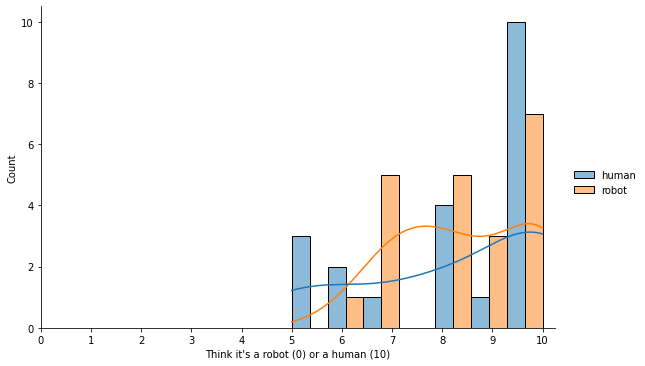

In [29]:
graph = sns.displot(data[data >=5],
            kde=True,
            fill=True,
            multiple="dodge",
            aspect=1.6)
graph.set( xlabel = "Think it's a robot (0) or a human (10)", xticks=[0,1,2,3,4,5,6,7,8,9,10])

In [26]:
data.human[data.human >= 5]

,human,human,human,human,human
0,8.0,NaN,8.0,NaN,10
1,7.0,10.0,9.0,10.0,10
2,NaN,10.0,NaN,NaN,10
3,10.0,NaN,5.0,NaN,10
4,6.0,10.0,8.0,NaN,5
5,6.0,10.0,8.0,NaN,5


C:\Users\sandr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sandr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


KstestResult(statistic=0.31, pvalue=6.865581733487208e-09)

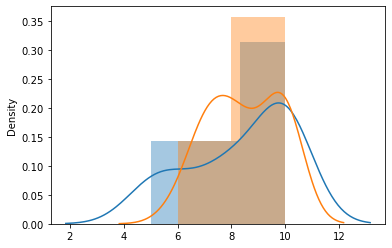

In [27]:
x_human, y_human = sns.distplot(data.human).get_lines()[0].get_data()
x_robot, y_robot = sns.distplot(data.robot).get_lines()[1].get_data()
test = stats.ks_2samp(y_human, y_robot)
test

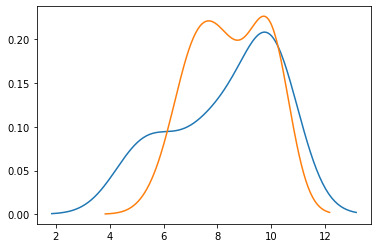

In [28]:
plt.plot(x_human,y_human)
plt.plot(x_robot,y_robot)

In [42]:
csv_file = pd.DataFrame({'human':y_human,'robot':y_robot})
csv_file.to_csv('csv_data.csv', sep=';')